In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets as dset
from torchvision import transforms as T

In [2]:
batch_size = 64

mnist_train = dset.MNIST('../data', train=True, download=True, transform=T.ToTensor())
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
mnist_test = dset.MNIST('../data', train=False, download=True, transform=T.ToTensor())
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

In [3]:
class Flatten(nn.Module):
    def forward(self, x):
        N, C, H, W = x.size()
        return x.view(N, -1)

In [4]:
class InceptionA(nn.Module):
    def __init__(self, in_channels):
        super(InceptionA, self).__init__()
        self.avg_pooling = torch.nn.AvgPool2d(kernel_size=3, stride=1, padding=1)
        self.conv1 = torch.nn.Conv2d(in_channels, 4, kernel_size=1)
        self.conv2 = torch.nn.Conv2d(in_channels, 3, kernel_size=1)
        self.conv3 = torch.nn.Conv2d(in_channels, 3, kernel_size=1)
        self.conv4 = torch.nn.Conv2d(3, 6, kernel_size=5, padding=2)

    def forward(self, x):
        h1 = self.avg_pooling(x)
        h1 = self.conv1(h1)
        h2 = self.conv2(x)
        h3 = self.conv3(x)
        h3 = self.conv4(h3)
        h = torch.cat([h1, h2, h3], 1)
        return h

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.network = nn.Sequential(
            nn.Conv2d(1, 5, kernel_size=5, stride=1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.ReLU(inplace=True),
            InceptionA(5),
            nn.Conv2d(13, 15, kernel_size=5, stride=1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.ReLU(inplace=True),
            InceptionA(15),
            Flatten(),
            nn.Linear(208, 10),
        )

    def forward(self, x):
        return self.network(x)

In [6]:
model = Net()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [8]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        y_hat = model(data)
        loss = loss_fn(y_hat, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        output = model(data)
        # sum up batch loss
        test_loss += loss_fn(output, target)
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss.data[0], correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

for epoch in range(0, 5):
    train(epoch)
    test()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  if sys.path[0] == '':


Train Epoch: 0 [0/60000 (0%)]	Loss: 2.303206
Train Epoch: 0 [640/60000 (1%)]	Loss: 2.310947
Train Epoch: 0 [1280/60000 (2%)]	Loss: 2.303035
Train Epoch: 0 [1920/60000 (3%)]	Loss: 2.291947
Train Epoch: 0 [2560/60000 (4%)]	Loss: 2.317144
Train Epoch: 0 [3200/60000 (5%)]	Loss: 2.275605
Train Epoch: 0 [3840/60000 (6%)]	Loss: 2.207914
Train Epoch: 0 [4480/60000 (7%)]	Loss: 1.797185
Train Epoch: 0 [5120/60000 (9%)]	Loss: 1.080351
Train Epoch: 0 [5760/60000 (10%)]	Loss: 0.950055
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.411503
Train Epoch: 0 [7040/60000 (12%)]	Loss: 0.545376
Train Epoch: 0 [7680/60000 (13%)]	Loss: 0.430041
Train Epoch: 0 [8320/60000 (14%)]	Loss: 0.575143
Train Epoch: 0 [8960/60000 (15%)]	Loss: 0.873004
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.485220
Train Epoch: 0 [10240/60000 (17%)]	Loss: 0.344117
Train Epoch: 0 [10880/60000 (18%)]	Loss: 0.297625
Train Epoch: 0 [11520/60000 (19%)]	Loss: 0.363587
Train Epoch: 0 [12160/60000 (20%)]	Loss: 0.265058
Train Epoch: 0 [12800/60000 (

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 0.0018, Accuracy: 9643/10000 (96%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.176103
Train Epoch: 1 [640/60000 (1%)]	Loss: 0.090203
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.204101
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.090119
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.111105
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.128435
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.052099
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.278617
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.174217
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.060668
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.169730
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.172304
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.036676
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.109607
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.114507
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.222725
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.054267
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.188926
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.137358
Train Epoch: 1 [12

Train Epoch: 2 [43520/60000 (72%)]	Loss: 0.125442
Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.038858
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.064285
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.166226
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.045233
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.021673
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.023717
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.049608
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.081227
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.130540
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.027865
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.035960
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.095198
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.047031
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.040616
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.082496
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.033299
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.045294
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.021491
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.028018


Train Epoch: 4 [26880/60000 (45%)]	Loss: 0.045693
Train Epoch: 4 [27520/60000 (46%)]	Loss: 0.034150
Train Epoch: 4 [28160/60000 (47%)]	Loss: 0.008916
Train Epoch: 4 [28800/60000 (48%)]	Loss: 0.048665
Train Epoch: 4 [29440/60000 (49%)]	Loss: 0.044514
Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.016459
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.066121
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.015391
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.110311
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.063505
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.036656
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.150469
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.178560
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.032240
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.110061
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.045116
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.060487
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.048019
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.008314
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.081143


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


target=4 (36.19%), pred=9 (63.53%)
target=9 (31.14%), pred=8 (67.94%)
target=4 (24.48%), pred=6 (63.68%)
target=6 (3.18%), pred=0 (96.47%)
target=5 (8.21%), pred=3 (91.75%)
target=9 (5.93%), pred=8 (75.73%)
target=5 (12.47%), pred=3 (87.51%)
target=6 (4.88%), pred=0 (90.90%)
target=8 (23.79%), pred=0 (73.03%)
target=8 (20.56%), pred=2 (71.46%)
target=2 (13.17%), pred=8 (48.92%)
target=8 (41.27%), pred=2 (41.68%)
target=2 (41.30%), pred=1 (53.87%)
target=5 (3.39%), pred=3 (96.60%)
target=7 (0.49%), pred=3 (98.33%)
target=1 (40.16%), pred=7 (56.16%)
target=5 (26.51%), pred=8 (69.23%)
target=4 (35.79%), pred=9 (59.54%)
target=9 (32.89%), pred=8 (67.10%)
target=2 (18.00%), pred=8 (70.00%)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


target=8 (34.03%), pred=9 (65.80%)
target=1 (18.97%), pred=2 (47.26%)
target=6 (24.18%), pred=0 (75.50%)
target=5 (21.05%), pred=3 (78.94%)
target=6 (0.63%), pred=5 (94.60%)
target=7 (1.14%), pred=3 (89.74%)
target=7 (5.18%), pred=8 (91.56%)
target=6 (42.81%), pred=5 (45.97%)
target=7 (1.57%), pred=2 (94.58%)
target=9 (15.80%), pred=4 (69.28%)
target=4 (35.66%), pred=9 (64.00%)
target=9 (0.03%), pred=3 (70.27%)
target=7 (44.76%), pred=1 (48.63%)
target=5 (0.33%), pred=7 (95.45%)
target=8 (19.18%), pred=0 (65.99%)
target=5 (33.27%), pred=6 (66.50%)
target=1 (44.15%), pred=6 (54.08%)
target=9 (1.05%), pred=7 (96.45%)
target=0 (44.86%), pred=6 (55.03%)
target=7 (21.66%), pred=9 (75.73%)
target=1 (2.14%), pred=3 (92.80%)
target=4 (16.75%), pred=6 (81.63%)
target=9 (8.77%), pred=3 (90.42%)
target=0 (4.74%), pred=6 (95.25%)
target=3 (4.06%), pred=7 (95.93%)
target=9 (10.35%), pred=3 (68.16%)
target=5 (3.96%), pred=3 (91.33%)
target=1 (13.43%), pred=6 (84.65%)
target=1 (4.90%), pred=2 (46.80%

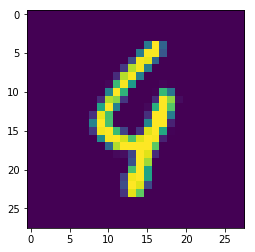

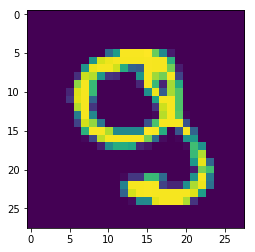

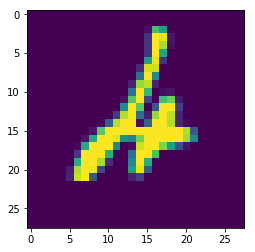

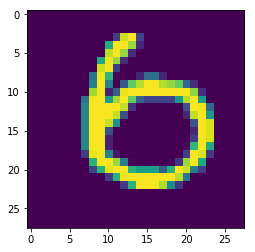

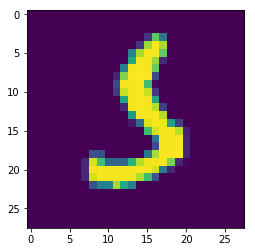

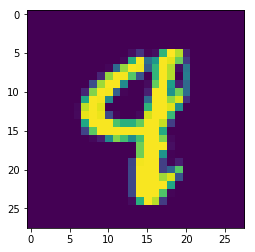

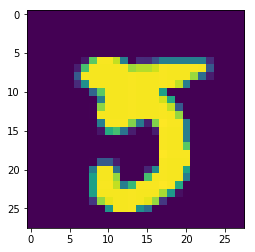

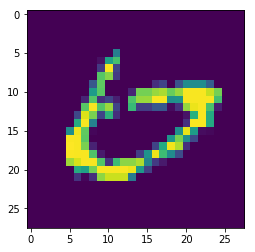

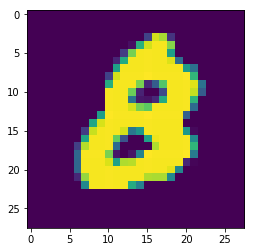

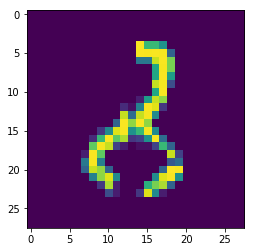

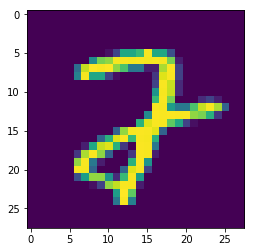

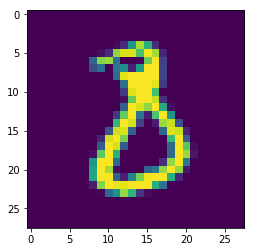

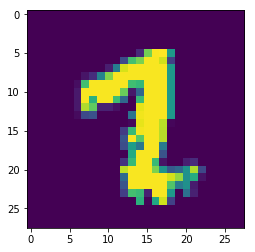

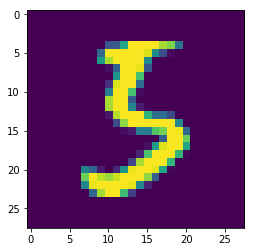

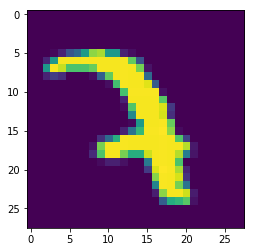

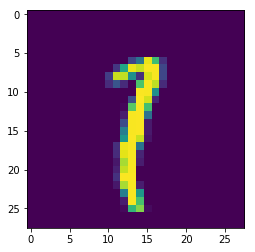

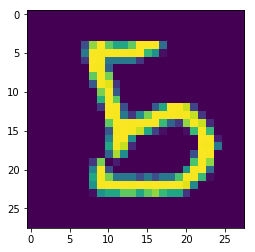

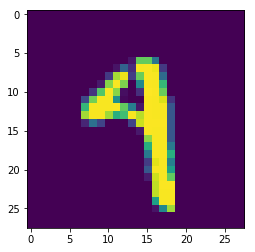

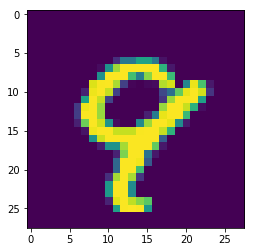

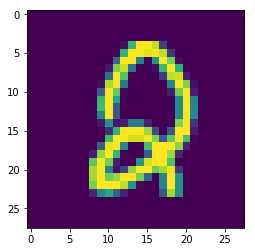

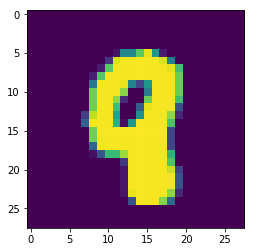

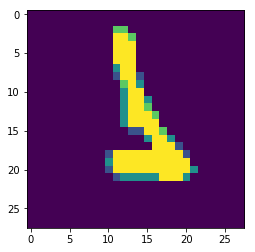

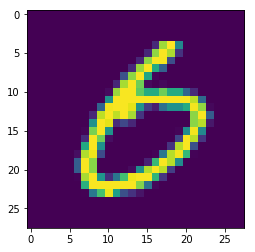

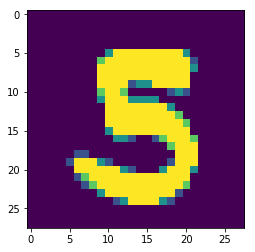

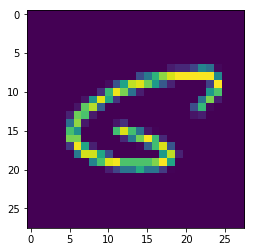

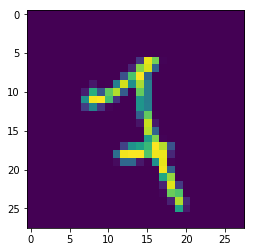

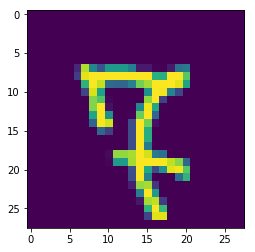

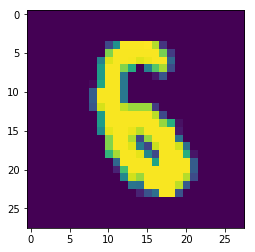

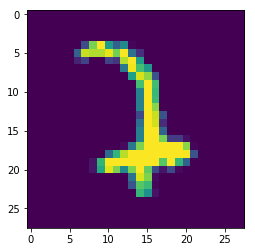

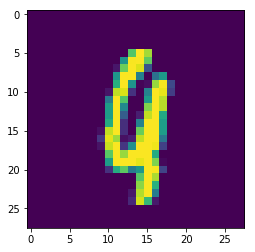

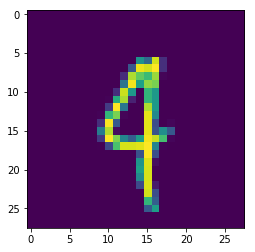

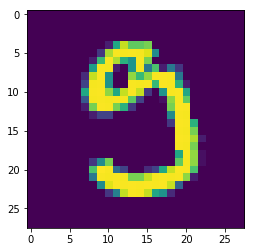

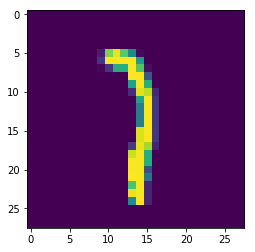

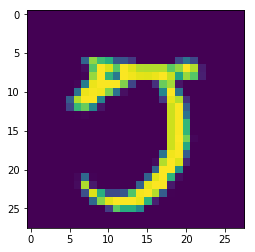

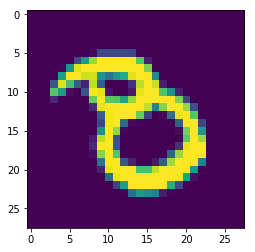

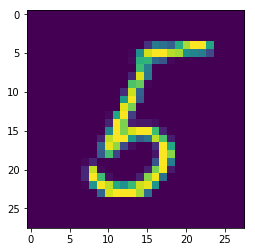

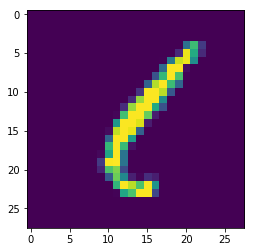

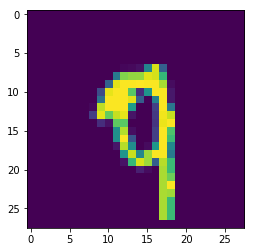

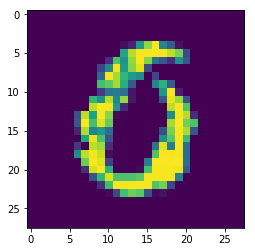

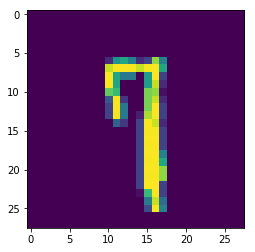

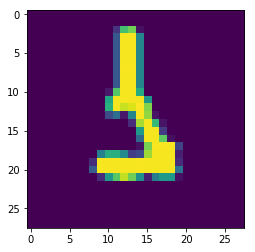

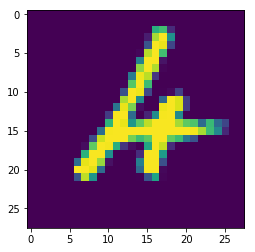

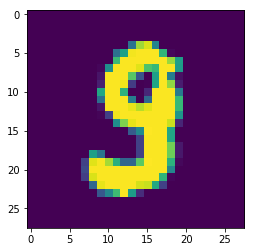

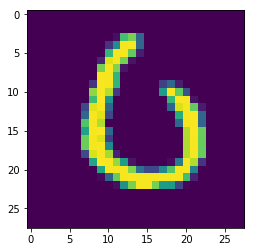

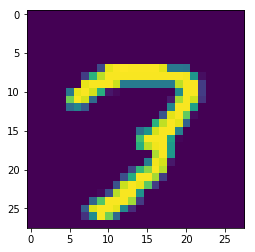

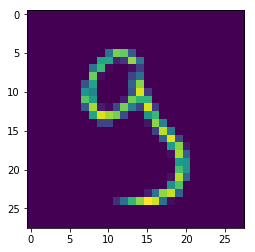

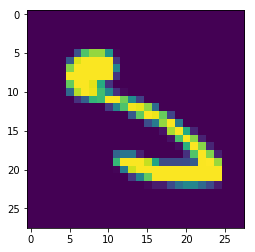

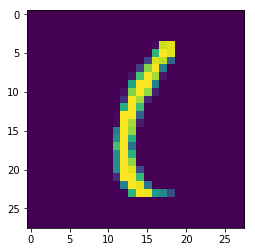

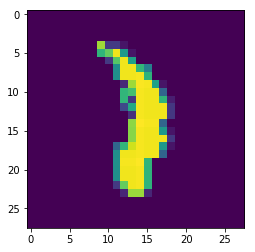

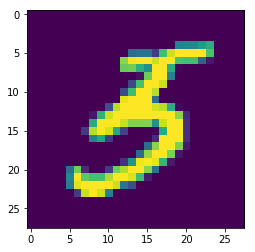

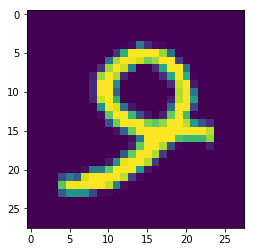

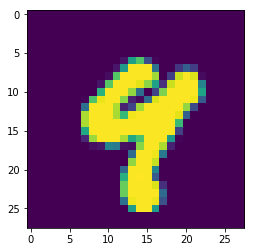

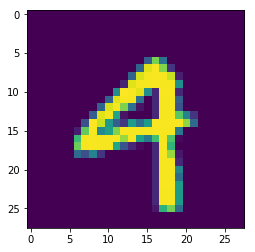

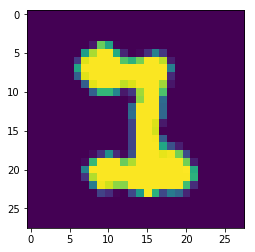

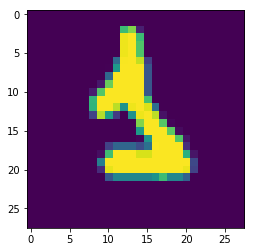

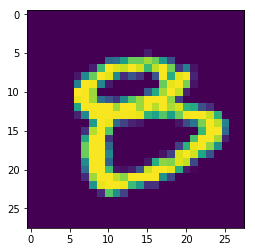

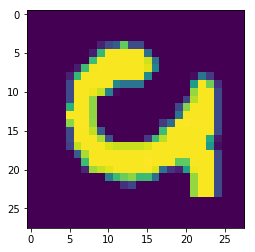

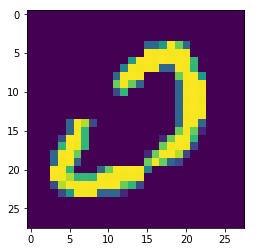

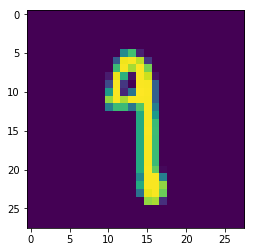

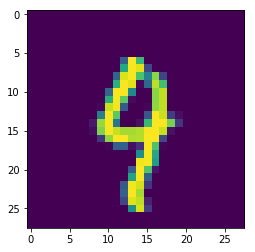

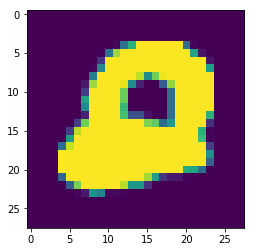

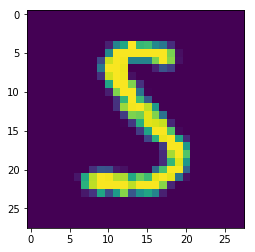

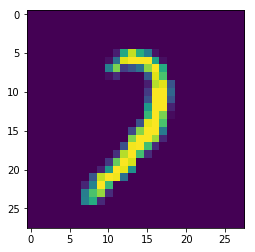

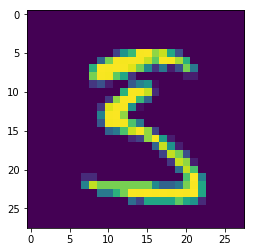

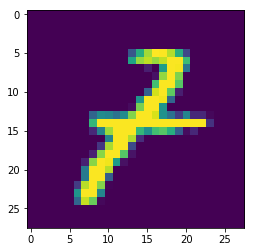

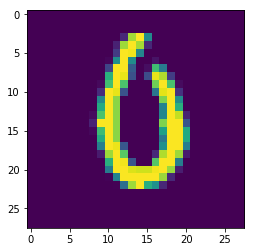

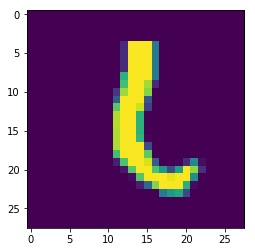

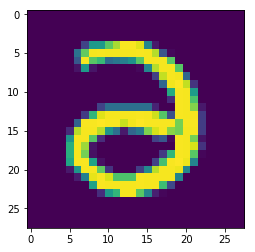

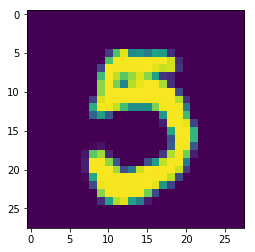

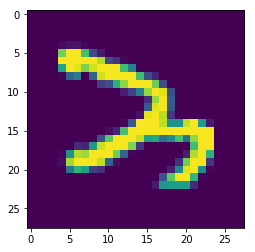

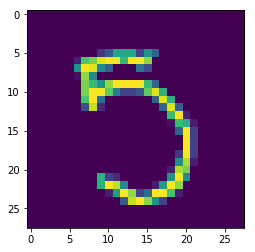

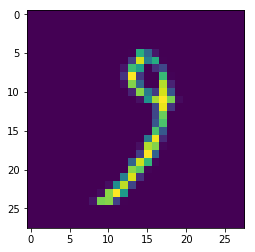

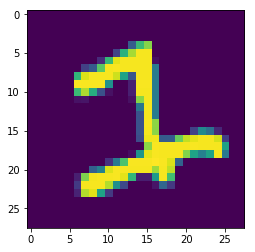

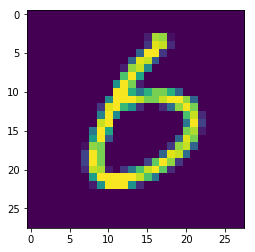

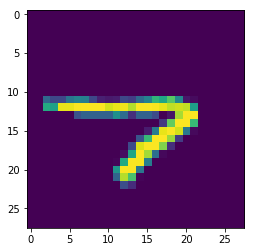

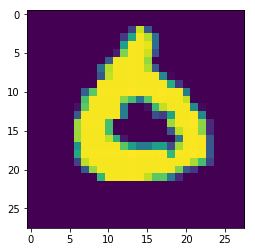

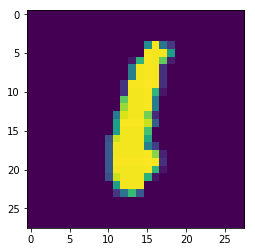

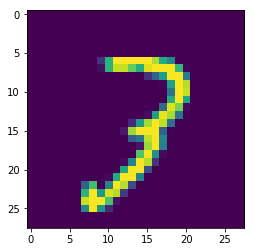

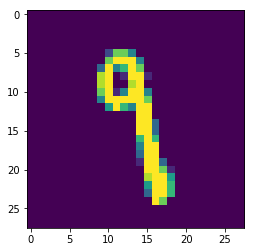

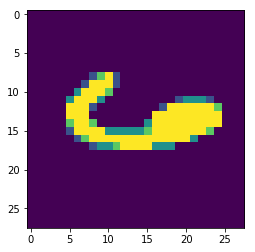

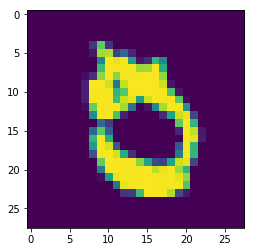

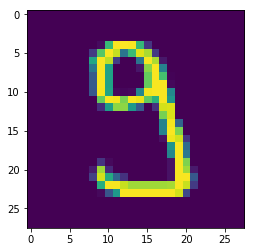

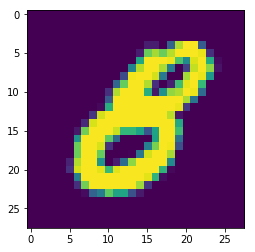

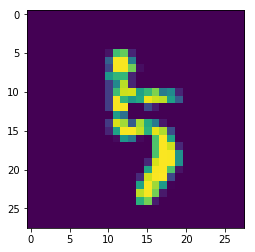

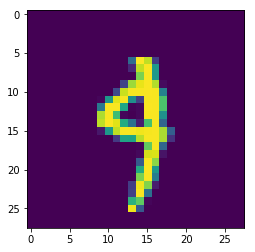

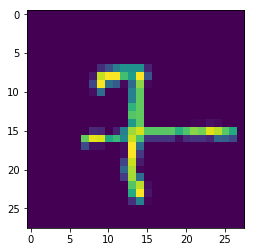

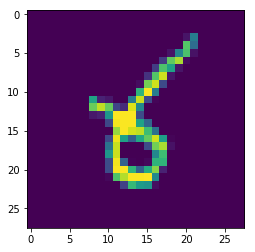

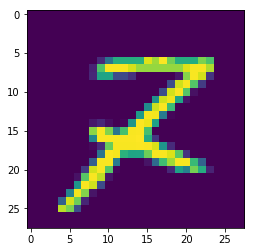

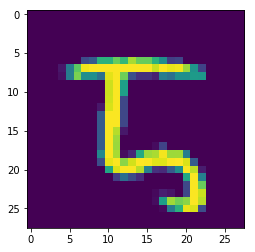

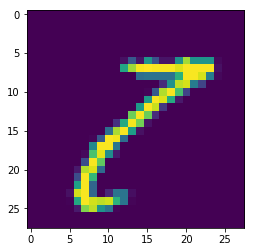

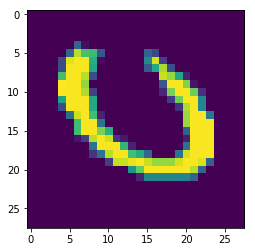

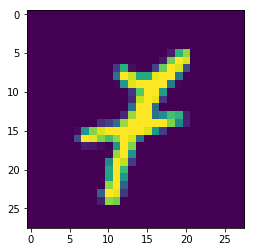

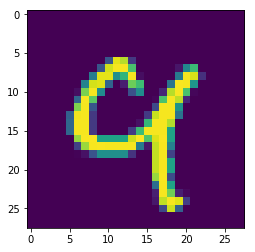

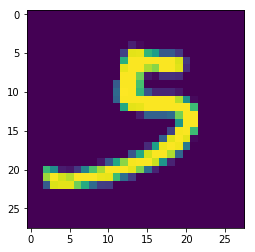

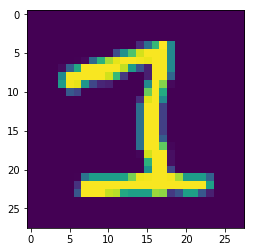

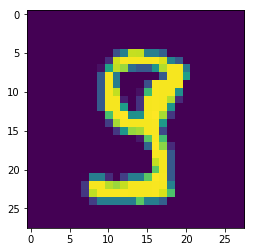

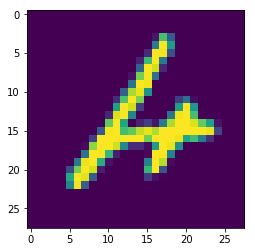

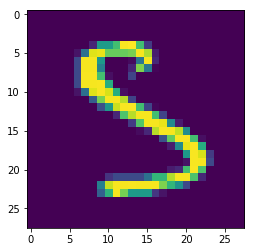

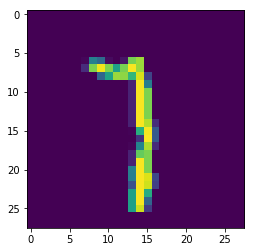

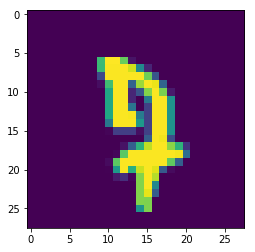

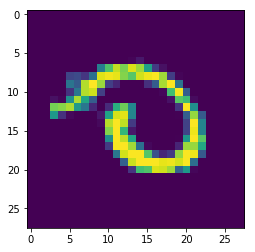

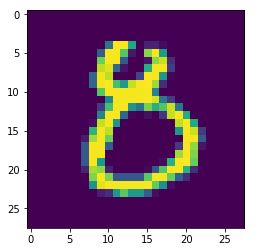

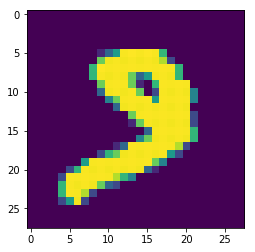

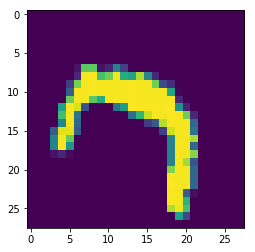

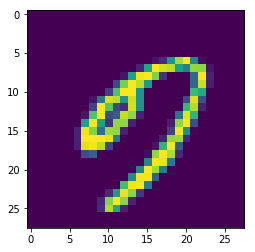

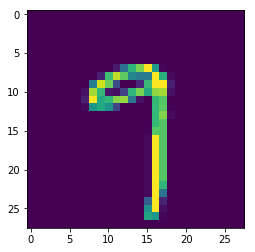

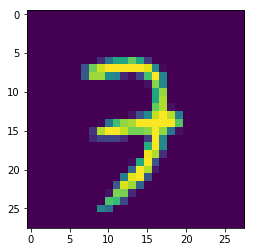

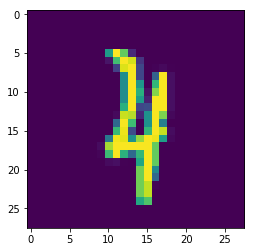

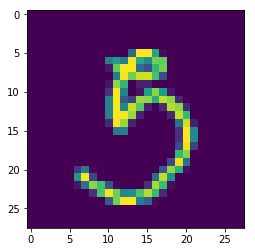

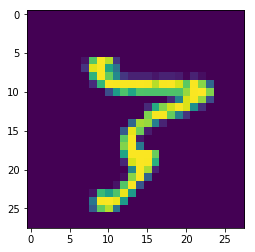

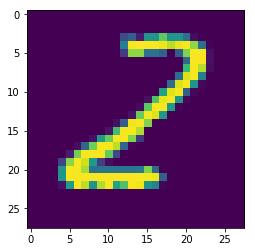

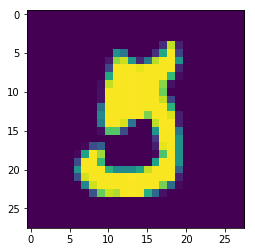

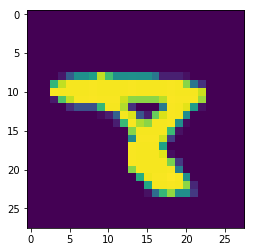

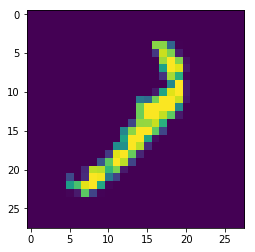

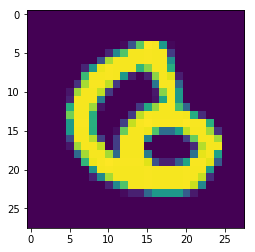

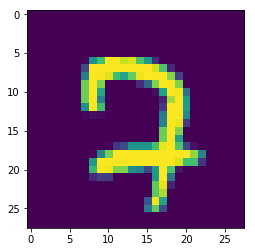

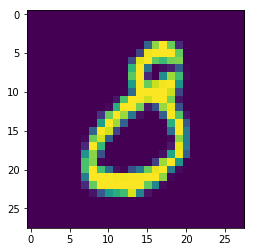

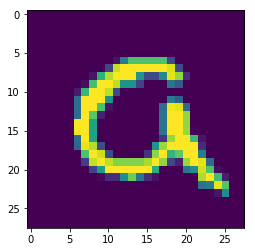

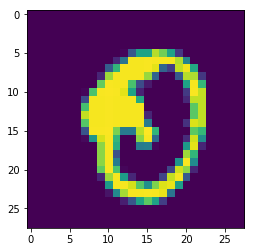

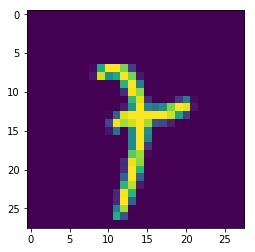

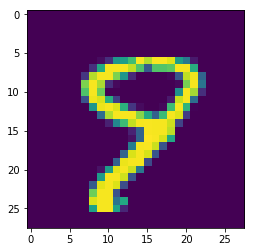

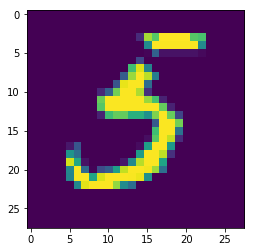

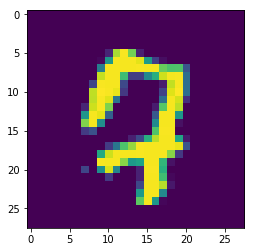

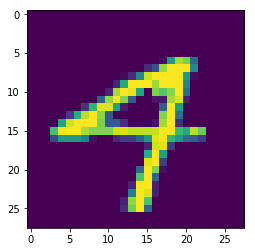

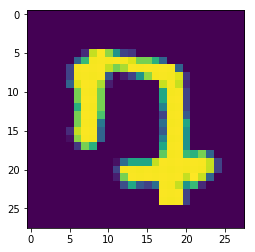

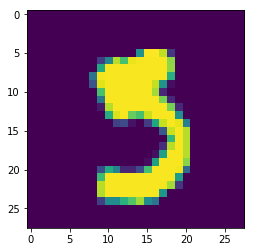

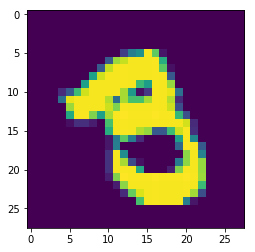

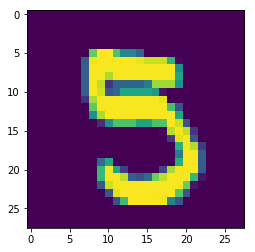

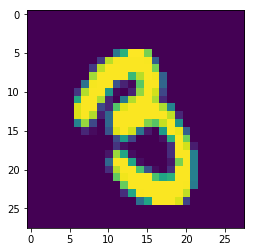

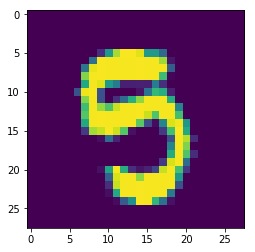

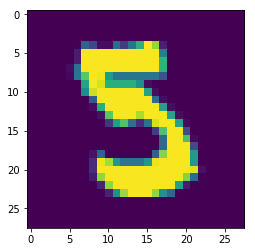

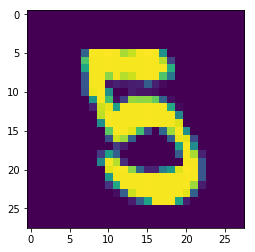

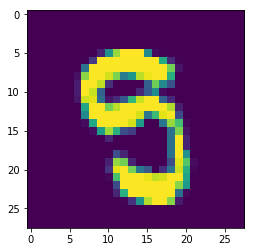

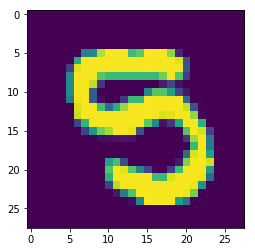

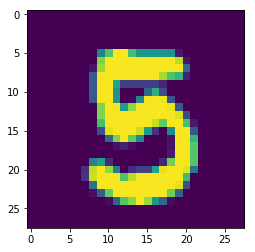

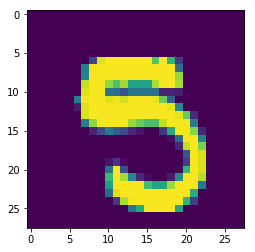

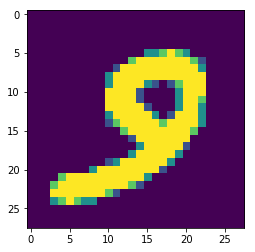

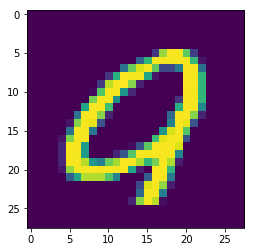

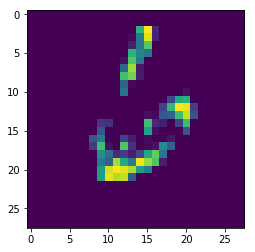

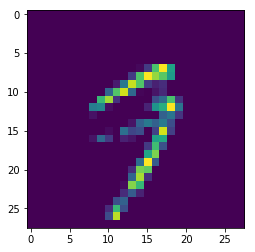

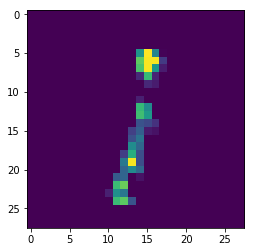

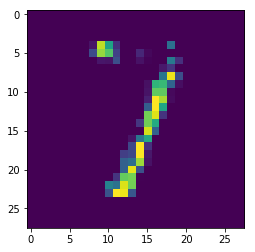

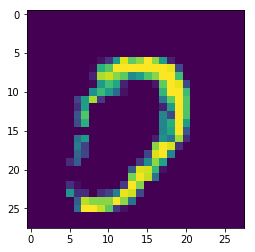

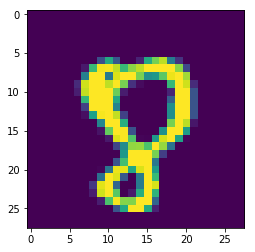

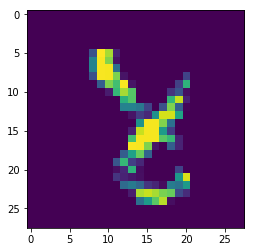

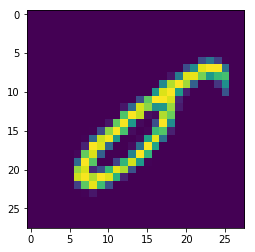

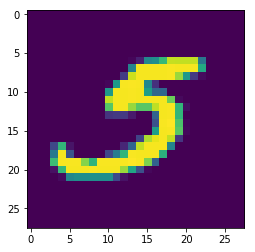

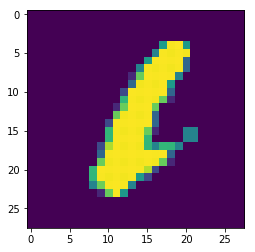

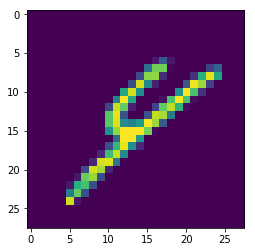

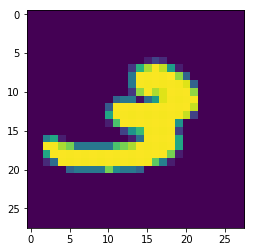

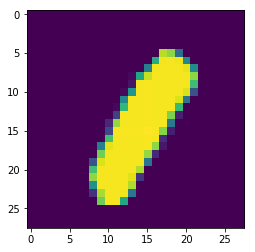

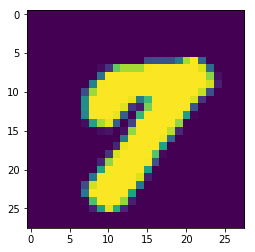

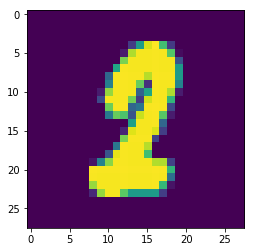

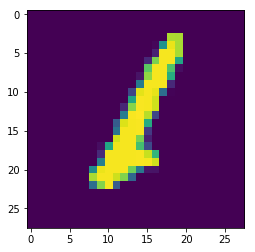

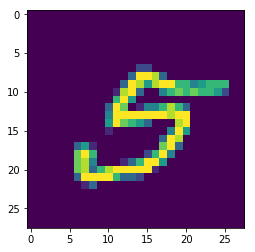

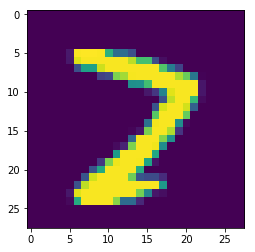

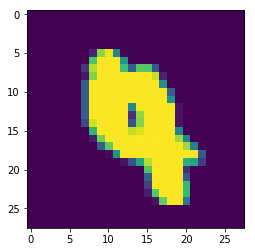

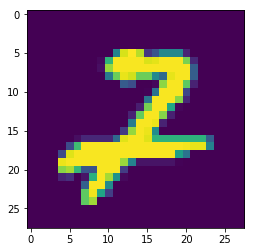

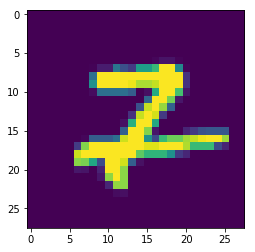

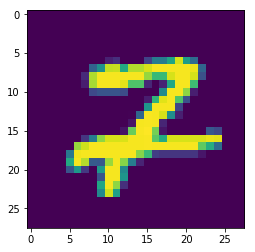

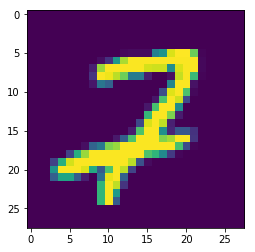

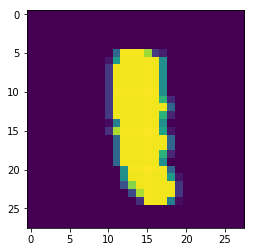

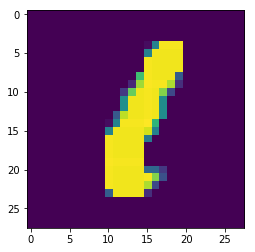

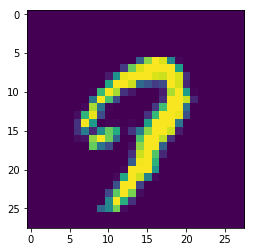

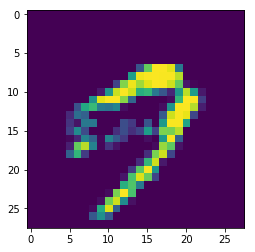

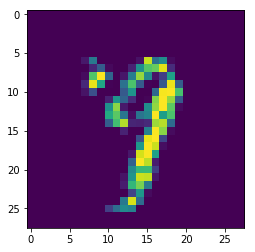

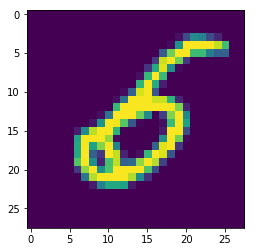

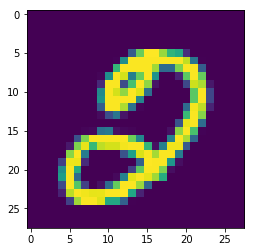

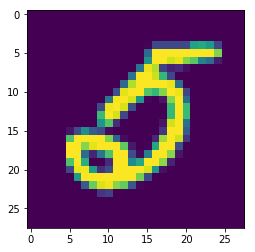

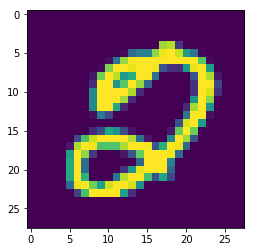

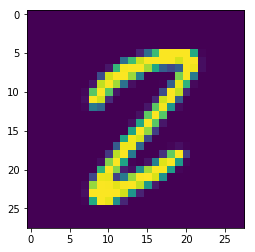

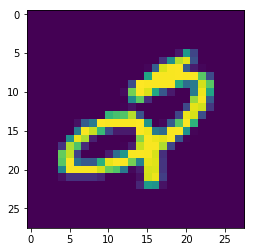

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

for data, target in test_loader:
    output = F.softmax(model(data))
    pred = output.data.max(1)[1]
    for idx, (t, p, o) in enumerate(zip(target, pred, output)):
        if t != p: 
            plt.figure()
            plt.imshow(data[idx].numpy()[0])
            print("target={:d} ({:.2f}%), pred={:d} ({:.2f}%)".format(
                t.numpy(), o[t].data.numpy()*100, p.numpy(), o[p].data.numpy()*100
            ))